X shape:  (117, 45)
Y shape:  (117,)
theta shape:  (45,)
Initial error: 0.6931471805599454


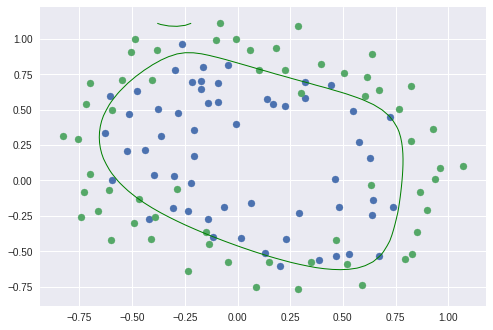

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn.preprocessing import PolynomialFeatures

data = pd.read_csv('logistic-data.txt')

data.columns = ['test1', 'test2', 'result']

# splitting positive / negative

passed = data[data['result'] == 1] 
failed = data[data['result'] == 0] 

plt.scatter(passed['test1'], passed['test2'])
plt.scatter(failed['test1'],failed['test2'])

# creating poly features

transformer = PolynomialFeatures(8)
X = data[['test1','test2']]
X_poly = transformer.fit_transform(X)
data = data.values
y = np.matrix(data[:,-1:])
theta = np.zeros([X_poly.shape[1],1])

vector_theta = theta.flatten()
vector_y = np.array(y).flatten()
vector_X = np.array(X_poly)
print('X shape: ', vector_X.shape)
print('Y shape: ', vector_y.shape)
print('theta shape: ', vector_theta.shape)

def sigmoid(z):
    return 1 / (1 +np.exp(- z))

def costFunction(theta, X, y):
    
    lymbda = 0.001
    m = X.shape[0]
    z = X @ theta 
    h = sigmoid(z)
    theta_reg = np.array(theta[1:])
    inner = -1 * np.sum(y.T * np.log(h)+ (1 - y).T * np.log(1 - h))/m 
    inner2 = lymbda * (np.sum(np.power(theta_reg,2)))/m
    return  inner + inner2

initialError = costFunction(theta, X_poly, y)
print('Initial error:', initialError)

# gradient function
def gradient (theta, X, y):
  
  lymbda = 0.001
  m = X.shape[0]
  
  theta0 = np.array([theta[0]])
  theta_tail = np.array(theta[1:])
  
  h = sigmoid(X @ theta)
  reg = lymbda *(np.power(theta,2))/m
  grad1 =  (1/m) *X.T @ (h - y) + reg
  grad1[0]  = grad1[0] - reg[0]
  return grad1

# fitting using fmin_tnc
optimized = opt.fmin_tnc(func=costFunction, x0=vector_theta, fprime=gradient, args=(vector_X, vector_y))
new_theta = optimized[0]

# Plot decision boundary
x1_min, x1_max = data[:,0].min(), data[:,0].max(),
x2_min, x2_max = data[:,1].min(), data[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(transformer.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(new_theta))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       

plt.show()